In [114]:
import pandas as pd # Importing pandas for data manipulation
import matplotlib.pyplot as plt # Importing matplotlib for plotting
import seaborn as sns # Importing seaborn for enhanced visualization

# Load the cleaned dataset
new_df = pd.read_csv("C:\\Users\\USER\\Desktop\\py\\APS_analysis\\data\\processed\\cleaned_data.csv")
pd.set_option('display.max_columns', None) # Show all columns in the DataFrame

In [115]:
catg_cols = ['gender', 'type of travel', 'class', 'customer type', 'satisfaction'] # categorical columns
num_cols = ['age', 'flight distance', 'departure delay in minutes', 'arrival delay in minutes'] # numerical columns

review_cols = ['inflight wifi service', 'departure/arrival time convenient', 'ease of online booking', 'gate location', 'food and drink', 'online boarding', 'seat comfort', 
                 'inflight entertainment', 'on board service', 'leg room service', 'baggage handling', 'checkin service', 'inflight service', 'cleanliness'] # review columns


Statistics for 'gender'
gender
Female    50.74
Male      49.26
Name: proportion, dtype: float64
-------------------------------

Statistics for 'type of travel'
type of travel
Business travel    69.06
Personal Travel    30.94
Name: proportion, dtype: float64
---------------------------------------

Statistics for 'class'
class
Business    47.86
Eco         44.89
Eco Plus     7.25
Name: proportion, dtype: float64
------------------------------

Statistics for 'customer type'
customer type
Loyal Customer       81.69
disloyal Customer    18.31
Name: proportion, dtype: float64
--------------------------------------

Statistics for 'satisfaction'
satisfaction
neutral or dissatisfied    56.55
satisfied                  43.45
Name: proportion, dtype: float64
-------------------------------------


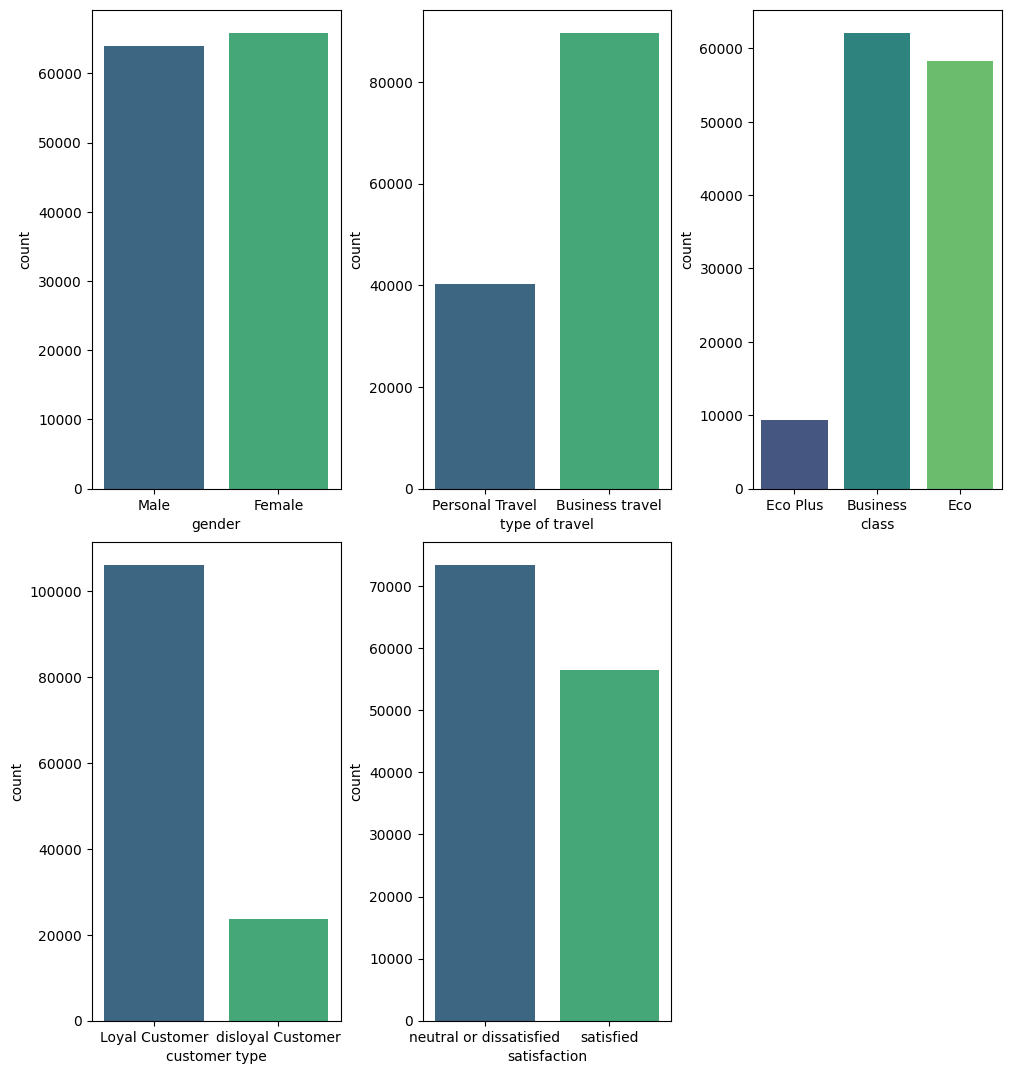

In [116]:
# Plotting Countplots for categorical columns
fig, axes = plt.subplots(len(catg_cols), 3, figsize=(10, 5*len(catg_cols)), constrained_layout=True) # Create subplot grid
axes = axes.flatten() # Flatten into 1D list for easy iteration

for ax, col in zip(axes, catg_cols): # Loop over categorical columns
    sns.countplot(data=new_df, x=col, hue=col, ax=ax, palette="viridis", legend=False)  # Bar plot counts for each category
    ax.tick_params(axis='x') # Format X-axis ticks

    # Calculate and print percentages for each category
    print(f"\nStatistics for '{col}'")
    col_percentages = new_df[col].value_counts(normalize=True).mul(100).round(2) # Percentage of each category
    print(col_percentages)
    print("-" * (25 + len(col)))

# Hide any unused subplots if the number of plots is not a perfect multiple
for j in range(len(catg_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()

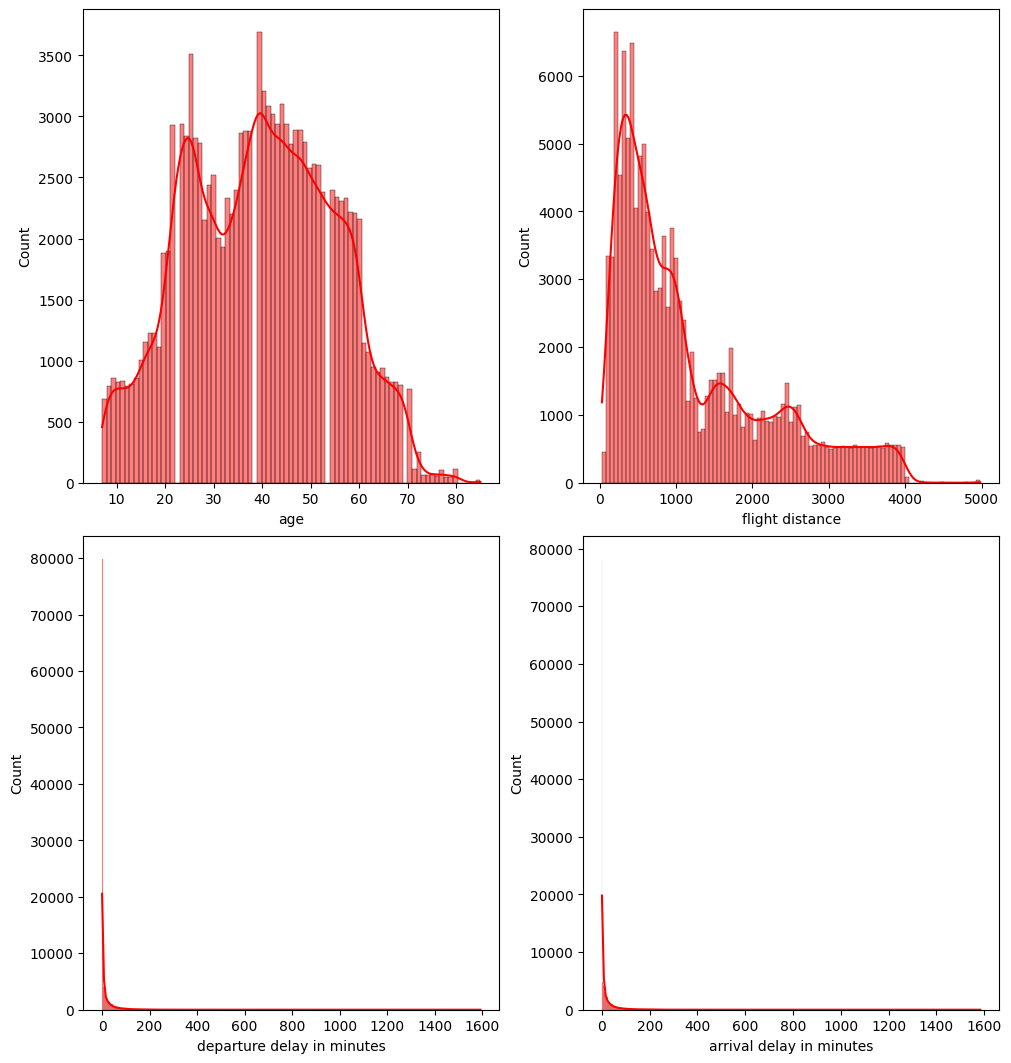


Descriptive Statistics for Numerical Columns
             age  flight distance  departure delay in minutes  \
count  129880.00        129880.00                   129880.00   
mean       39.43          1190.32                       14.71   
std        15.12           997.45                       38.07   
min         7.00            31.00                        0.00   
25%        27.00           414.00                        0.00   
50%        40.00           844.00                        0.00   
75%        51.00          1744.00                       12.00   
max        85.00          4983.00                     1592.00   

       arrival delay in minutes  
count                 129880.00  
mean                      15.16  
std                       38.60  
min                        0.00  
25%                        0.00  
50%                        0.00  
75%                       13.00  
max                     1584.00  
--------------------------------------------------


In [117]:
# Plotting Histograms for numerical columns
fig, axes = plt.subplots(len(num_cols), 2, figsize=(10, 5*len(num_cols)), constrained_layout=True)
axes = axes.flatten()

for ax, col in zip(axes, num_cols): # Loop over numerical columns
    sns.histplot(data=new_df, x=col, kde=True, ax=ax, color='red') # Histogram with KDE line
    
# Hide any unused subplots if the number of plots is not a perfect multiple
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Print descriptive statistics for all numerical columns
print("\nDescriptive Statistics for Numerical Columns")
print(new_df[num_cols].describe().round(2))
print("-" * 50)

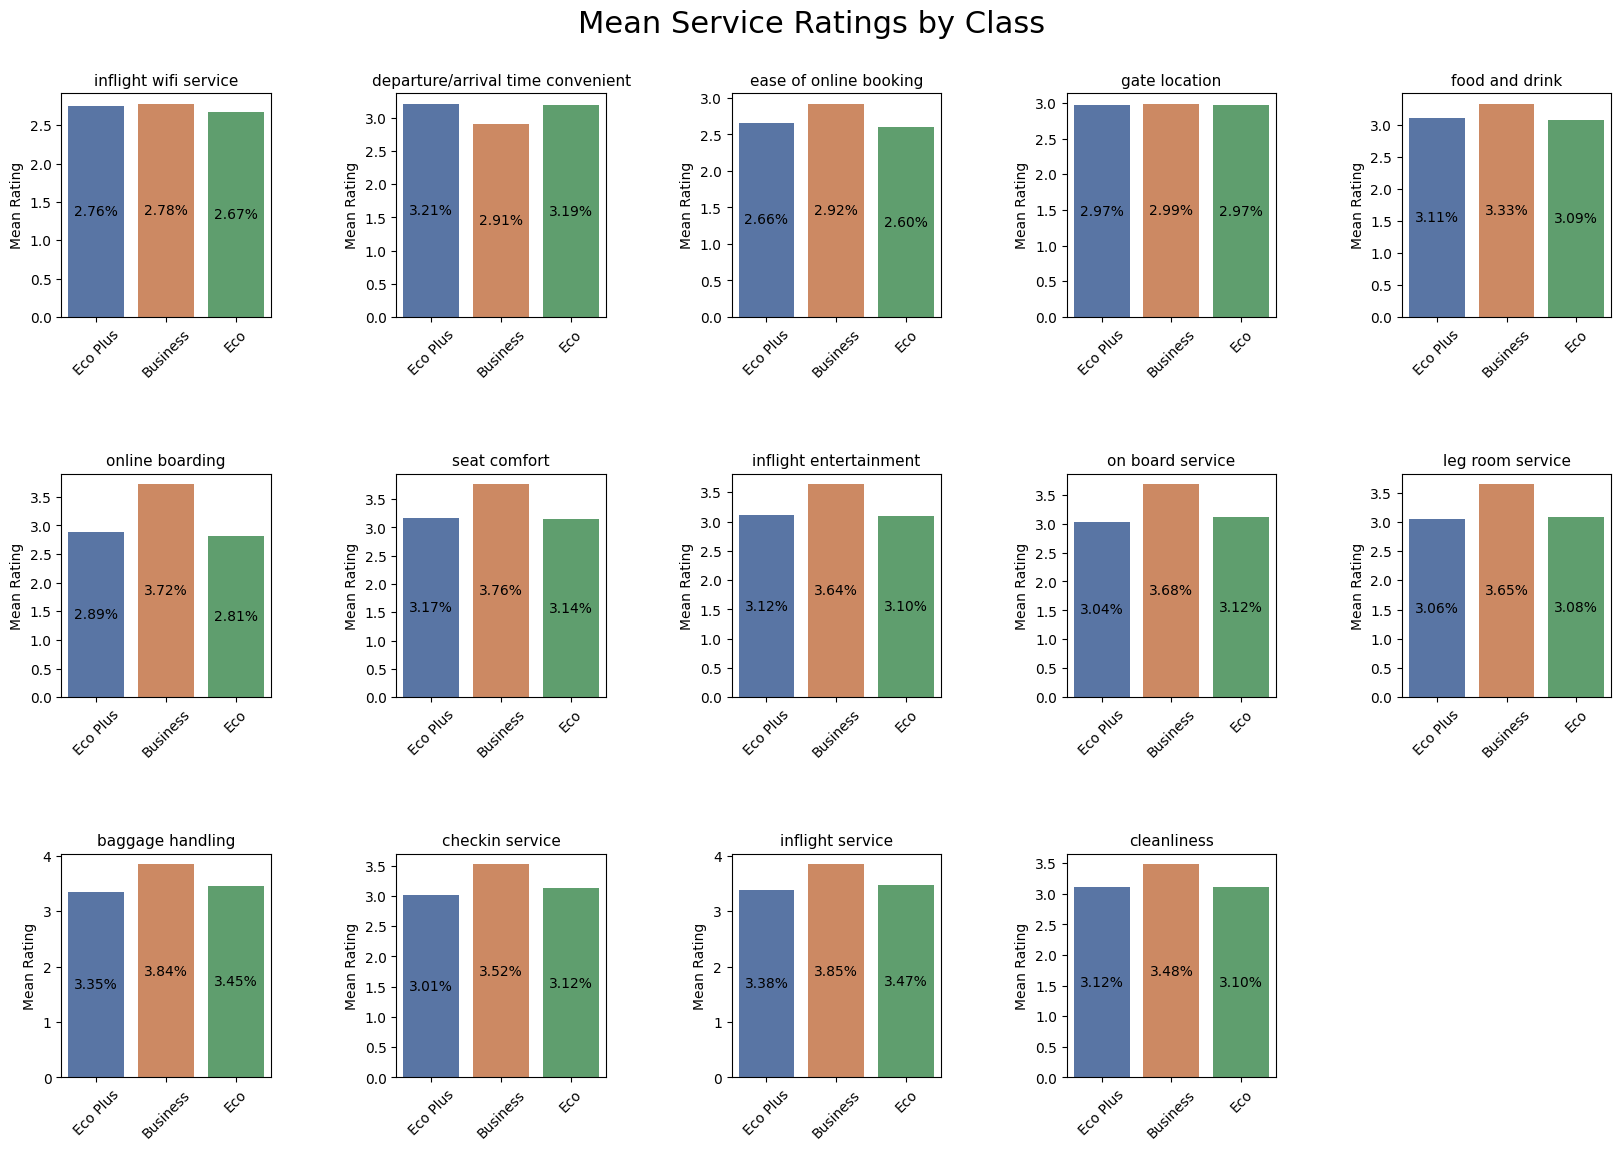


--- Mean Scores for All Services ---
class                              Business   Eco  Eco Plus
inflight wifi service                  2.78  2.67      2.76
departure/arrival time convenient      2.91  3.19      3.21
ease of online booking                 2.92  2.60      2.66
gate location                          2.99  2.97      2.97
food and drink                         3.33  3.09      3.11
online boarding                        3.72  2.81      2.89
seat comfort                           3.76  3.14      3.17
inflight entertainment                 3.64  3.10      3.12
on board service                       3.68  3.12      3.04
leg room service                       3.65  3.08      3.06
baggage handling                       3.84  3.45      3.35
checkin service                        3.52  3.12      3.01
inflight service                       3.85  3.47      3.38
cleanliness                            3.48  3.10      3.12
--------------------------------------------------


In [118]:
# Create a single large figure for all service ratings
# We have 14 review columns, so a 3x5 grid is suitable (3*5=15 plots)
fig, axes = plt.subplots(3, 5, figsize=(20, 12)) # 3x5 grid for 14 plots
fig.suptitle('Mean Service Ratings by Class', fontsize=22, y=1.0)
axes = axes.flatten() # Flatten the 3x5 grid into a 1D array

# Loop through all review columns and plot them
for i, col in enumerate(review_cols):
    ax = axes[i] # Select the appropriate subplot
    sns.barplot(data=new_df, x='class', y=col, hue= 'class', ax=ax, palette="deep", errorbar=None) # Average rating by class
    ax.set_title(col, fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('Mean Rating')

    ax.tick_params(axis='x', rotation=45)

    # Add average values above each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.2f%%', color='black', fontsize= 10) # Adds percentage labels inside each bar: 
                                                                                        # 'label_type' sets label position (center of the bar), 
                                                                                        # 'fmt' formats the label as a percentage with two decimals, 
                                                                                        # 'color' sets text color, 
                                                                                        # 'fontsize' sets text size.

# Hide any unused subplots if the number of plots is not a perfect multiple
for j in range(len(review_cols), len(axes)):
        fig.delaxes(axes[j])

fig.subplots_adjust(top=0.93, hspace=0.7, wspace=0.6) # Adjusts the overall figure layout: 
                                                      # 'top' controls the top margin, 
                                                      # 'hspace' controls vertical spacing between subplots, 
                                                      # 'wspace' controls horizontal spacing between subplots.
plt.show()

print(f"\n--- Mean Scores for All Services ---")
all_mean_scores = new_df.groupby('class')[review_cols].mean().round(2)
print(all_mean_scores.T)
print("-" * 50)


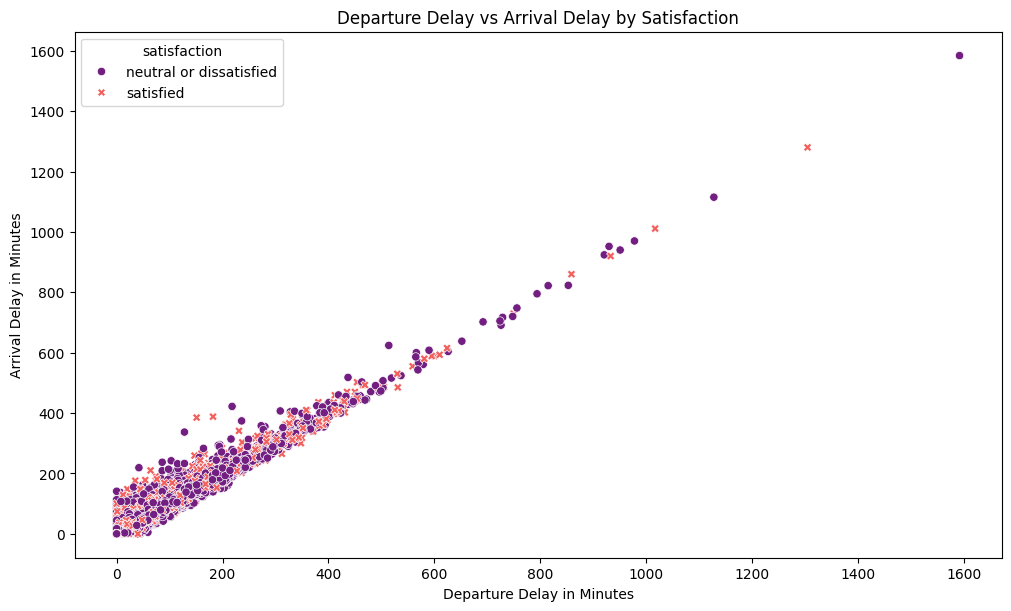


--- Delay Statistics by Satisfaction ---
Correlation between Departure and Arrival Delay: 0.97

Mean Delays (in minutes):
                         departure delay in minutes  arrival delay in minutes
satisfaction                                                                 
neutral or dissatisfied                       16.41                     17.12
satisfied                                     12.51                     12.61
--------------------------------------------------


In [119]:
# plotting a scatter plot to visualize the relationship between departure delay and arrival delay
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True) 
sns.scatterplot(data=new_df, x='departure delay in minutes', y='arrival delay in minutes',
                hue='satisfaction', style='satisfaction', ax=ax, palette="magma") 

plt.title("Departure Delay vs Arrival Delay by Satisfaction")
plt.xlabel("Departure Delay in Minutes")
plt.ylabel("Arrival Delay in Minutes")
plt.show()

 # Print correlation and mean delays by satisfaction
print("\n--- Delay Statistics by Satisfaction ---")
delay_corr = new_df[['departure delay in minutes', 'arrival delay in minutes']].corr().iloc[0, 1]
print(f"Correlation between Departure and Arrival Delay: {delay_corr:.2f}")
print("\nMean Delays (in minutes):")
print(new_df.groupby('satisfaction')[['departure delay in minutes', 'arrival delay in minutes']].mean().round(2))
print("-" * 50)

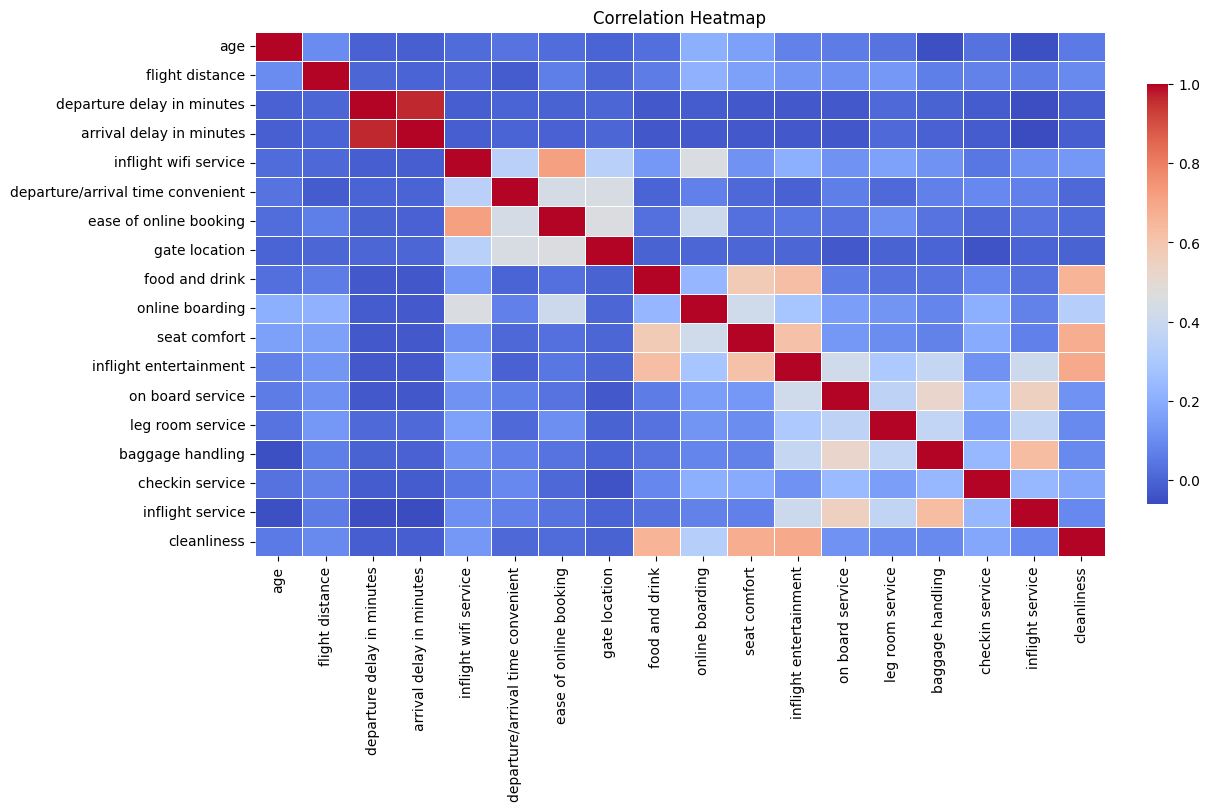

In [120]:
# plotting a correlation heatmap for numerical and review columns
plt.figure(figsize=(12, 8), constrained_layout=True)
corr = new_df[num_cols + review_cols].corr()

sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

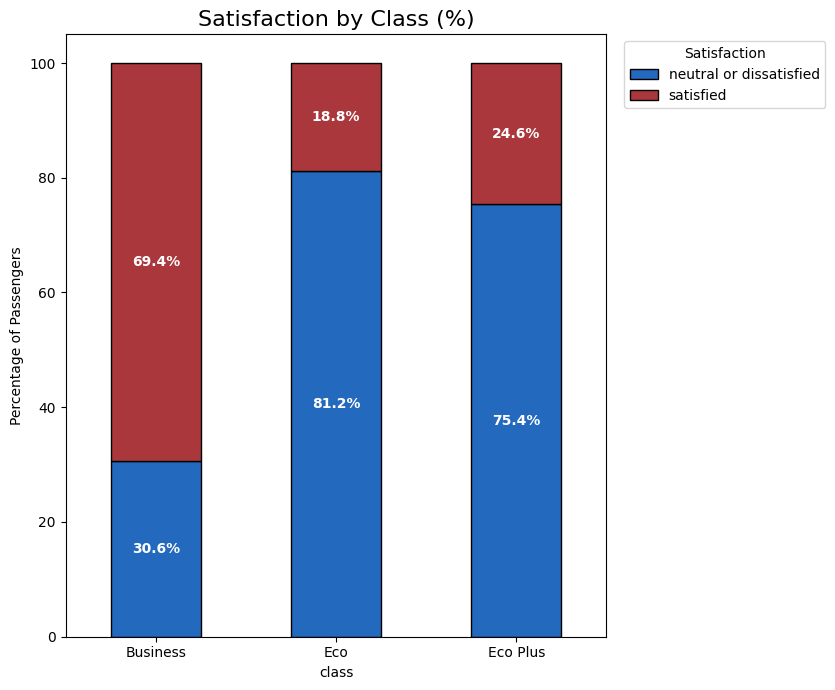


Satisfaction Percentage by Class
satisfaction  neutral or dissatisfied  satisfied
class                                           
Business                        30.56      69.44
Eco                             81.23      18.77
Eco Plus                        75.36      24.64


In [121]:
# Calculate percentages for the table
stacked_data = new_df.groupby('class')['satisfaction'].value_counts(normalize=True).mul(100).round(2).unstack()

# Create the plot
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 7), colormap="vlag", edgecolor='black')
plt.title("Satisfaction by Class (%)", fontsize=16)
plt.ylabel("Percentage of Passengers")
plt.xticks(rotation=0)

# Add percentage labels inside the stacked bars
for container in ax.containers: 
    # The label_type='center' places the text in the middle of the bar segment
    ax.bar_label(container, label_type='center', fmt='%.1f%%', color='white', weight='bold')

plt.legend(title='Satisfaction', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

# Print the percentage table
print("\nSatisfaction Percentage by Class")
print(stacked_data)